In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [38]:
supercorpus = './data_1/supercorpus_V4.csv'
BEL= './data_1/parliament speeches/ParlEE_BE_plenary_speeches.csv'
DE= './data_1/parliament speeches/ParlEE_DE_plenary_speeches.csv'
FR= './data_1/parliament speeches/ParlEE_FR_plenary_speeches.csv'
HU= './data_1/parliament speeches/ParlEE_HU_plenary_speeches.csv'
UK= './data_1/parliament speeches/ParlEE_UK_plenary_speeches.csv'
PT= './data_1/parliament speeches/ParlEE_PT_plenary_speeches.csv'
AT= './data_1/parliament speeches/ParlEE_AT_plenary_speeches.csv'
IE= './data_1/parliament speeches/ParlEE_IE_plenary_speeches.csv'

In [39]:
df = pd.read_csv(supercorpus)
de_df = pd.read_csv(DE)
fr_df = pd.read_csv(FR)
hu_df = pd.read_csv(HU)
uk_df = pd.read_csv(UK)
pt_df = pd.read_csv(PT)
at_df = pd.read_csv(AT)
ie_df = pd.read_csv(IE)
bel_df = pd.read_csv(BEL)

/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/3608586949.py:2: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  de_df = pd.read_csv(DE)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/3608586949.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(FR)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/3608586949.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_df = pd.read_csv(UK)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/3608586949.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  at_df = pd.read_csv(AT)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/3608586949.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or s

In [121]:
datasets = [de_df, fr_df, hu_df, uk_df, pt_df, at_df, ie_df, bel_df]

# Preprocessing

In [108]:
de_df['year'] = pd.to_datetime(de_df['date'], format='%d/%m/%Y').dt.year
fr_df['year'] = pd.to_datetime(fr_df['date'], format='%d/%m/%Y').dt.year
hu_df['year'] = pd.to_datetime(hu_df['date'], format='%d/%m/%Y').dt.year
uk_df['year'] = pd.to_datetime(uk_df['date'], format='%d/%m/%Y').dt.year
pt_df['year'] = pd.to_datetime(pt_df['date'], format='%d/%m/%Y').dt.year
at_df['year'] = pd.to_datetime(at_df['date'], format='%d/%m/%Y').dt.year
ie_df['year'] = pd.to_datetime(ie_df['date'], format='%d/%m/%Y').dt.year
bel_df['year'] = pd.to_datetime(bel_df['date'], format='%d/%m/%Y').dt.year

In [120]:
at_df['iso3country'] = 'AUS'
de_df['iso3country'] = 'GER'

## Dataset Exploration: amount of data available

In [44]:
bel_df

instance_id        date                                     agenda  \
0               1.0  22/10/2009  01 Renvoi de projets de loi en commission   
1               2.0  22/10/2009  01 Renvoi de projets de loi en commission   
2               3.0  22/10/2009  01 Renvoi de projets de loi en commission   
3               4.0  22/10/2009  01 Renvoi de projets de loi en commission   
4               5.0  22/10/2009  01 Renvoi de projets de loi en commission   
...             ...         ...                                        ...   
471102     470868.0  24/01/2019             13 Adoption de l’ordre du jour   
471103     470869.0  24/01/2019             13 Adoption de l’ordre du jour   
471104     470870.0  24/01/2019             13 Adoption de l’ordre du jour   
471105     470871.0  24/01/2019             13 Adoption de l’ordre du jour   
471106     470872.0  24/01/2019             13 Adoption de l’ordre du jour   

        speechnumber  paragraphnumber  sentencenumber party  \
0                  1                1               1   NaN   
1                  1                1               2   NaN   
2                  1                1               3   NaN   
3                  1                2               1   NaN   
4                  1                2               2   NaN   
...              ...              ...             ...   ...   
471102            67                1               2   NaN   
471103            67                2               1   NaN   
471104            67                2               2   NaN   
471105            67                3               1   NaN   
471106            67                3               2   NaN   

                                                     text speaker  cmp_party  \
0                                                      M.     NaN        NaN   
1       Christian Brotcorne et consorts ont déposé un ...     NaN        NaN   
2       Conformément à l'avis de la Conférence des pré...     NaN        NaN   
3                                      Pas d'observation?     NaN        NaN   
4                                 (Non) Il en sera ainsi.     NaN        NaN   
...                                                   ...     ...        ...   
471102  L'ordre du jour de cette séance prévoit une do...     NaN        NaN   
471103                                 Pas d’observation?     NaN        NaN   
471104                (Non) L’ordre du jour est approuvé.     NaN        NaN   
471105                     La séance est levée à 16 h 20.     NaN        NaN   
471106  Prochaine séance le jeudi 31 janvier 2019 à 14...     NaN        NaN   

        eu  policyarea iso3country                    parliament  \
0        0          10         BEL  BE-Chambre_des_representants   
1        0           1         BEL  BE-Chambre_des_representants   
2        0           1         BEL  BE-Chambre_des_representants   
3        0          12         BEL  BE-Chambre_des_representants   
4        0          20         BEL  BE-Chambre_des_representants   
...     ..         ...         ...                           ...   
471102   0          20         BEL  BE-Chambre_des_representants   
471103   0          12         BEL  BE-Chambre_des_representants   
471104   0          20         BEL  BE-Chambre_des_representants   
471105   0          12         BEL  BE-Chambre_des_representants   
471106   0          20         BEL  BE-Chambre_des_representants   

       iso3country.1                  parliament.1  
0                BEL  BE-Chambre_des_representants  
1                BEL  BE-Chambre_des_representants  
2                BEL  BE-Chambre_des_representants  
3                BEL  BE-Chambre_des_representants  
4                BEL  BE-Chambre_des_representants  
...              ...                           ...  
471102           BEL  BE-Chambre_des_representants  
471103           BEL  BE-Chambre_des_representants  
471104           BEL  BE-Chambre_des_representants  
471105

In [45]:

bel_df['year'].value_counts()

year
2016    50473
2013    49968
2017    49534
2015    48721
2012    46924
2009    46413
2018    45838
2011    45067
2014    36216
2019    30703
2010    21250
Name: count, dtype: int64

In [46]:
bel_df.columns

Index(['instance_id', 'date', 'agenda', 'speechnumber', 'paragraphnumber',
       'sentencenumber', 'party', 'text', 'speaker', 'cmp_party', 'eu',
       'policyarea', 'iso3country', 'parliament', 'iso3country.1',
       'parliament.1', 'year'],
      dtype='object')

In [47]:
bel_df.iloc[900]['text']

'Elles ont abouti à une nouvelle proposition de convention collective que les organisations syndicales souhaitent soumettre à leur base.'

each row is just a phrase in a discussion about the topic in 'agenda'. check them out since some of them talk about migration

In [135]:
bel_df['year'].value_counts()

year
2016    50473
2013    49968
2017    49534
2015    48721
2012    46924
2009    46413
2018    45838
2011    45067
2014    36216
2019    30703
2010    21250
Name: count, dtype: int64

In [109]:
#GERMANY
de_df['year'].value_counts()

year
2019    348389
2011    314846
2012    310838
2010    298486
2018    295350
2014    283405
2015    266268
2016    240204
2013    223112
2017    158579
2009    126558
Name: count, dtype: int64

In [110]:
#FRANCE
fr_df['year'].value_counts()

year
2018    581141
2013    565452
2019    517332
2009    470648
2015    426832
2014    417424
2010    394787
2011    373007
2016    354967
2017    286439
2012    284447
Name: count, dtype: int64

In [111]:
#HUNGARY
hu_df['year'].value_counts()

year
2015    237305
2016    222168
2011    189210
2017    186960
2009    173481
2019    148804
2018    147246
2012    135340
2013    133112
2010    131431
2014     64250
Name: count, dtype: int64

In [112]:
#UNITED KINGDOM
uk_df['year'].value_counts()

year
2018    709182
2016    667512
2013    636677
2011    634054
2019    629548
2014    598344
2010    587362
2012    579069
2009    576419
2015    575861
2017    572998
Name: count, dtype: int64

In [113]:
#PORTUGAL
pt_df['year'].value_counts()

year
2012    136126
2013    127868
2010    120806
2018    118479
2014    118356
2009    113864
2016    110515
2019    109973
2017    109472
2011    109430
2015    103111
2021         2
2022         2
2020         1
Name: count, dtype: int64

In [114]:
#AUSTRIA
at_df['year'].value_counts()

year
2009    179674
2015    155968
2014    154629
2011    152035
2010    145866
2012    140845
2016    138143
2013    130335
2018    129812
2017    108865
2019     90190
Name: count, dtype: int64

In [119]:
at_df['iso3country'].value_counts()

#i want to modify the iso3country column to AUS for all the rows
at_df['iso3country'] = 'AUS'

at_df['iso3country'].value_counts()

iso3country
AUS    1526362
Name: count, dtype: int64

In [115]:
#IRELAND
ie_df['year'].value_counts()

year
2018    411524
2017    388443
2012    382800
2019    382444
2013    382252
2014    372472
2015    371341
2009    337033
2010    335620
2011    318944
2016    305152
Name: count, dtype: int64

## Extracting relevant data

Building all the functions to:
- filter the datasets in order to keep only the relevant speeches (namely the ones regarding migration)
- compute sentiment analysis for every datapoint in these datasets

In [136]:
def filter_dataframe_by_words(df, words):
    # Combine all words into a single regex pattern (joined by "|")
    pattern = '|'.join(words)
    
    # Filter the DataFrame for rows where 'Text' contains any of the words
    matching_df = df[df['text'].str.contains(pattern, case=False, na=False)]
    #print(matching_df.index.tolist())
    # Return the filtered DataFrame
    return matching_df

In [137]:
from textblob import TextBlob

def sentiment_analysis(df):
    # Create a new column 'Sentiment' with the sentiment of each speech
    df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    #df = df[df['Sentiment'] > treshold]
    return df


In [124]:
dataset_languages = {
    'de_df': 'German',
    'fr_df': 'French',
    'hu_df': 'Hungarian',
    'uk_df': 'English',
    'pt_df': 'Portuguese',
    'at_df': 'German',
    'ie_df': 'English',  # Assuming English for simplicity; add Irish if needed
    'be_df': 'Dutch'  # Belgium added with Dutch as one of the languages
}

# Language-specific migration words dictionary
migration_words = {
    'English': ['migration', 'refuge', 'asylum', 'immigrant', 'migrant', 'border', 'integration', 'inclusion', 'exclusion', 'citizenship', 'national', 'foreigner', 'foreign', 'minority'],
    'French': ['migration', 'réfugié', 'asile', 'immigrant', 'migrant', 'frontière', 'intégration', 'inclusion', 'exclusion', 'citoyenneté', 'national', 'étranger', 'étrangère', 'minorité'],
    'German': ['Migration', 'Flüchtling', 'Asyl', 'Einwanderer', 'Migrant', 'Grenze', 'Integration', 'Inklusion', 'Exklusion', 'Staatsbürgerschaft', 'national', 'Ausländer', 'ausländisch', 'Minderheit'],
    'Portuguese': ['migração', 'refugiado', 'asilo', 'imigrante', 'migrante', 'fronteira', 'integração', 'inclusão', 'exclusão', 'cidadania', 'nacional', 'estrangeiro', 'estrangeira', 'minoria'],
    'Hungarian': ['migráció', 'menekült', 'menedék', 'bevándorló', 'migráns', 'határ', 'integráció', 'befogadás', 'kizárás', 'állampolgárság', 'nemzeti', 'külföldi', 'idegen', 'kisebbség'],
    'Dutch': ['migratie', 'toevlucht', 'asiel', 'immigrant', 'migrant', 'grens', 'integratie', 'inclusie', 'uitsluiting', 'burgerschap', 'nationaal', 'buitenlander', 'vreemd', 'minderheid']
}

migration_words['Belgium'] = list(set(migration_words['Dutch'] + migration_words['French']))

# Initialize filtered datasets list
filtered_datasets = []

# Iterate through datasets and filter them using the appropriate words
for dataset_name, dataset in zip(dataset_languages.keys(), datasets):
    # Get the language for the current dataset
    language = dataset_languages[dataset_name]
    
    # Get the relevant words for this language
    words_to_use = migration_words[language]
    
    # Filter the dataset (assuming filter_dataframe_by_words is a defined function)
    filtered_datasets.append(filter_dataframe_by_words(dataset, words_to_use))

[95, 96, 98, 99, 215, 238, 239, 240, 241, 249, 299, 300, 311, 318, 320, 321, 322, 323, 329, 469, 524, 590, 640, 661, 663, 666, 686, 687, 716, 720, 721, 736, 739, 775, 776, 779, 781, 783, 785, 814, 859, 879, 884, 915, 938, 1007, 1008, 1078, 1085, 1104, 1105, 1133, 1166, 1236, 1266, 1269, 1272, 1278, 1280, 1281, 1283, 1284, 1285, 1294, 1311, 1334, 1336, 1339, 1342, 1403, 1470, 1508, 1960, 2092, 2128, 2129, 2132, 2195, 2207, 2220, 2249, 2290, 2318, 2322, 2335, 2362, 2366, 2627, 2635, 2661, 2688, 2692, 2762, 2770, 2798, 2799, 2800, 2808, 2812, 2816, 2818, 2819, 2820, 2825, 2858, 2875, 3010, 3013, 3117, 3135, 3147, 3161, 3209, 3249, 3257, 3274, 3311, 3359, 3396, 3398, 3449, 3521, 3579, 3619, 3872, 3875, 3880, 3904, 3905, 3907, 3908, 3928, 3971, 3972, 3986, 4018, 4020, 4220, 4282, 4284, 4550, 4558, 4561, 4562, 4563, 4564, 4566, 4567, 4569, 4570, 4573, 4574, 4575, 4577, 4578, 4579, 4580, 4581, 4583, 4585, 4610, 4615, 4620, 4625, 4626, 4627, 4628, 4629, 4638, 4639, 4642, 4643, 4646, 4650, 4654

In [125]:
# migration_words = ['migration', 'refuge', 'asylum','immigrant', 'migrant', 'border', 'integration', 'inclusion', 'exclusion', 'citizenship', 'national', 'foreigner', 'foreign']

# filtered_datasets =[]

# for dataset in datasets:
#     filtered_datasets.append(filter_dataframe_by_words(dataset, all_migration_words))


In [126]:
# i want to apply the sentiment_analysis function to all the filtered datasets

sentiment_datasets = []

for dataset in filtered_datasets:
    sentiment_datasets.append(sentiment_analysis(dataset))

#now i want to concatenate all the datasets into a single dataframe



/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/1615729152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/1615729152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
/var/folders/06/25_1mnt97hq60zy5672y3qzw0000gn/T/ipykernel_27438/1615729152.py:5: SettingWithCopyWarni

In [127]:
final_df = pd.concat(sentiment_datasets)

final_df

instance_id        date  \
95             96.0  14/01/2009   
96             97.0  14/01/2009   
98             99.0  14/01/2009   
99            100.0  14/01/2009   
215           216.0  14/01/2009   
...             ...         ...   
468759     468525.0  24/10/2019   
469203     468969.0  24/10/2019   
469469     469235.0  24/10/2019   
469473     469239.0  24/10/2019   
469488     469254.0  24/10/2019   

                                                   agenda  speechnumber  \
95                                                    NaN             2   
96                                                    NaN             2   
98                                                    NaN             2   
99                                                    NaN             2   
215                                                   NaN             6   
...                                                   ...           ...   
468759  07 Questions jointes de - Wouter De Vriendt à ...            35   
469203  14 Projet de loi ouvrant des crédits provisoir...            90   
469469  14 Projet de loi ouvrant des crédits provisoir...           121   
469473  14 Projet de loi ouvrant des crédits provisoir...           121   
469488  14 Projet de loi ouvrant des crédits provisoir...           125   

        sentencenumber                  speaker party  \
95                  86            Angela Merkel   CDU   
96                  87            Angela Merkel   CDU   
98                  89            Angela Merkel   CDU   
99                  90            Angela Merkel   CDU   
215                 26  Frank-Walter Steinmeier   SPD   
...                ...                      ...   ...   
468759               4        Yasmine Kherbache  sp.a   
469203               3              Hervé Rigot    PS   
469469               1            Theo Francken  N-VA   
469473               5            Theo Francken  N-VA   
469488               5            Theo Francken  N-VA   

                                                     text  \
95      Das muss das Ziel sein ; denn eindimensionale ...   
96      Die andere Seite der Medaille ist die aktive G...   
98      Ich habe die europäischen Teilnehmer dieser G-...   
99      Deshalb werde ich Anfang Februar mit den inter...   
215     Wir gehen gezielt in die Förderung von Innovat...   
...                                                   ...   
468759  Nous devons nous montrer durs envers les passe...   
469203  Aujourd'hui il faut des crédits pour rattraper...   
469469  Dans le dossier de la migration, le problème d...   
469473  Peu de temps avant les élections, de nombreux ...   
469488  Par ailleurs, des équipes mixtes pourraient ég...   

                          parliament iso3country  ... eu  policyarea  \
95                      DE-Bundestag         GER  ...  0           5   
96                      DE-Bundestag         GER  ...  0          19   
98                      DE-Bundestag         GER  ...  0          19   
99                      DE-Bundestag         GER  ...  0          19   
215                     DE-Bundestag         GER  ...  1           7   
...                              ...         ...  ... ..         ...   
468759  BE-Chambre_des_representants         BEL  ...  0          12   
469203  BE-Chambre_des_representants         BEL  ...  0           1   
469469  BE-Chambre_des_representants         BEL  ...  0           9   
469473  BE-Chambre_des_representants         BEL  ...  0           9   
469488  BE-Chambre_des_representants         BEL  ...  0           9   

        cmp_party  year  Sentiment  paragraphnumber  speakerrole speaker_uri  \
95        41521.0  2009        0.0              NaN          NaN         NaN   
96        41521.0  2009        0.0              NaN          NaN         NaN   
98        41521.0  2009        0.0              NaN          NaN         NaN   
99        41521.0  2009        0.0              NaN          NaN         NaN   
215

In [128]:
final_df.columns

Index(['instance_id', 'date', 'agenda', 'speechnumber', 'sentencenumber',
       'speaker', 'party', 'text', 'parliament', 'iso3country', 'chair', 'eu',
       'policyarea', 'cmp_party', 'year', 'Sentiment', 'paragraphnumber',
       'speakerrole', 'speaker_uri', 'iso3country.1', 'parliament.1'],
      dtype='object')

In [129]:

#rename the iso3country column to country

final_df = final_df.rename(columns={'iso3country': 'nation'})
final_df['nation'].value_counts()

nation
GBR    254618
FRA    173720
IRE    131369
HUN    119390
GER     84925
AUS     59617
PRT     50829
BEL       418
Name: count, dtype: int64

# Plots
Given the preprocessing steps which allowed me to build the final_df dataset
I want to do the following plots:
- amount of datapoints for each year for each country


In [102]:
final_df.columns

Index(['instance_id', 'date', 'agenda', 'speechnumber', 'sentencenumber',
       'speaker', 'party', 'text', 'parliament', 'nation', 'chair', 'eu',
       'policyarea', 'cmp_party', 'year', 'Sentiment', 'paragraphnumber',
       'speakerrole', 'speaker_uri'],
      dtype='object')

In [130]:
final_df['nation'].value_counts()

nation
GBR    254618
FRA    173720
IRE    131369
HUN    119390
GER     84925
AUS     59617
PRT     50829
BEL       418
Name: count, dtype: int64

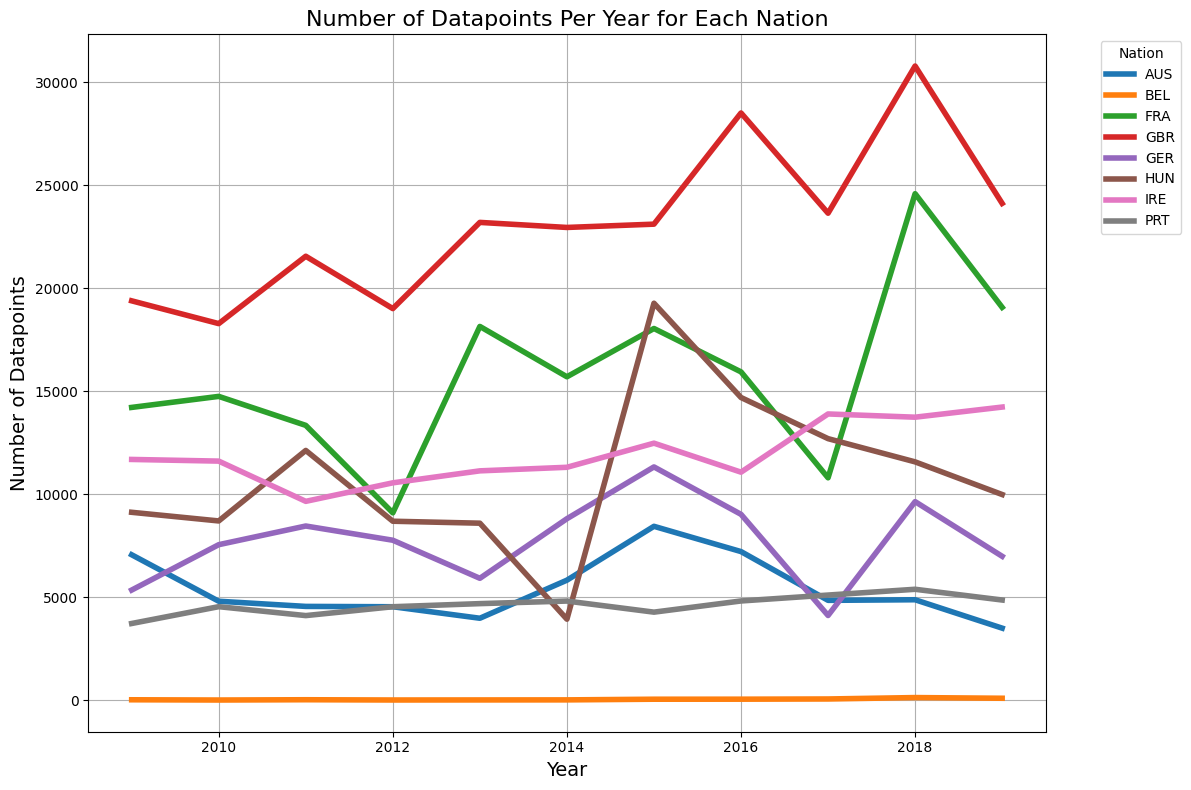

In [131]:
# Group by 'nation' and 'year', and count occurrences
grouped = final_df.groupby(['nation', 'year']).size().reset_index(name='datapoints')

# Pivot the table to have 'year' as columns and 'nation' as rows
pivot_table = grouped.pivot(index='year', columns='nation', values='datapoints')

# Plot
plt.figure(figsize=(12, 8))
for nation in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[nation], label=nation, linewidth=4 )

# Customize the plot
plt.title("Number of Datapoints Per Year for Each Nation", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Datapoints", fontsize=14)
plt.legend(title="Nation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

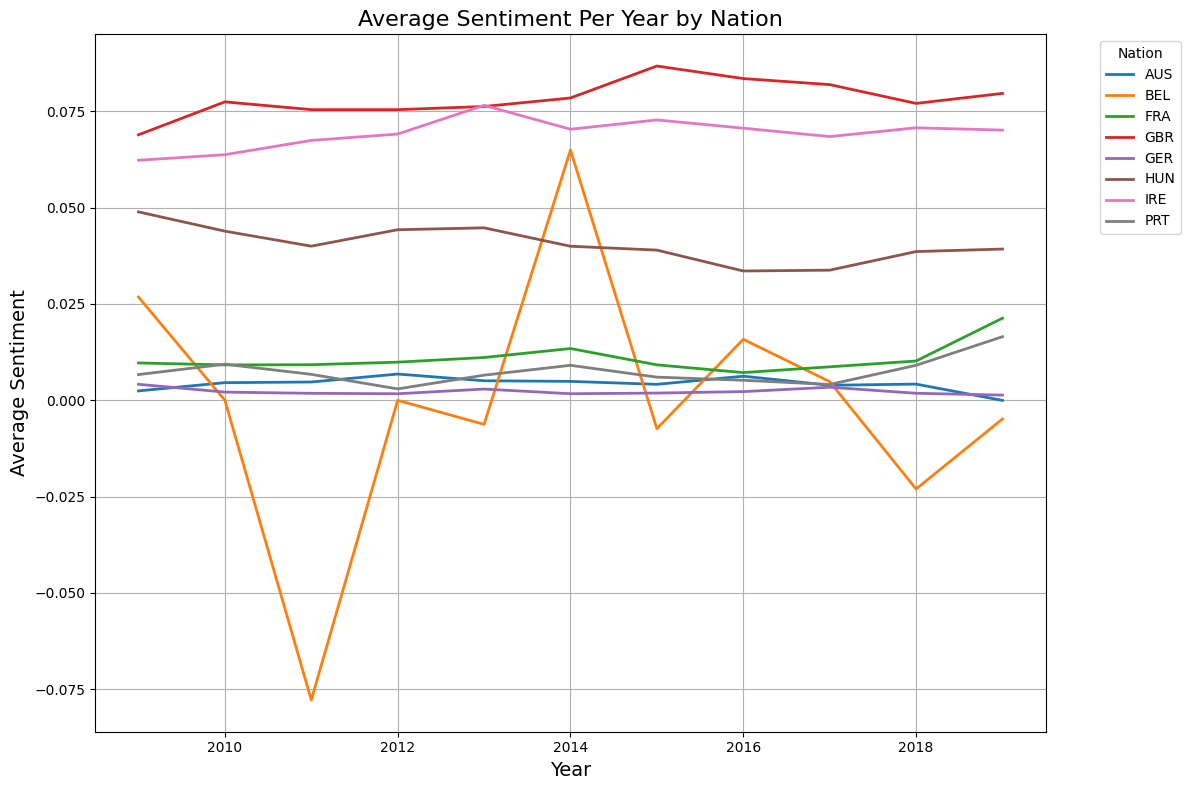

In [132]:

# Group by 'nation' and 'year', calculate the mean sentiment
sentiment_avg = final_df.groupby(['nation', 'year'])['Sentiment'].mean().reset_index()

# Pivot for plotting
pivot_sentiment = sentiment_avg.pivot(index='year', columns='nation', values='Sentiment')

# Plot
plt.figure(figsize=(12, 8))
for nation in pivot_sentiment.columns:
    plt.plot(pivot_sentiment.index, pivot_sentiment[nation], label=nation, linewidth=2)

# Customize the plot
plt.title("Average Sentiment Per Year by Nation", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Sentiment", fontsize=14)
plt.legend(title="Nation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

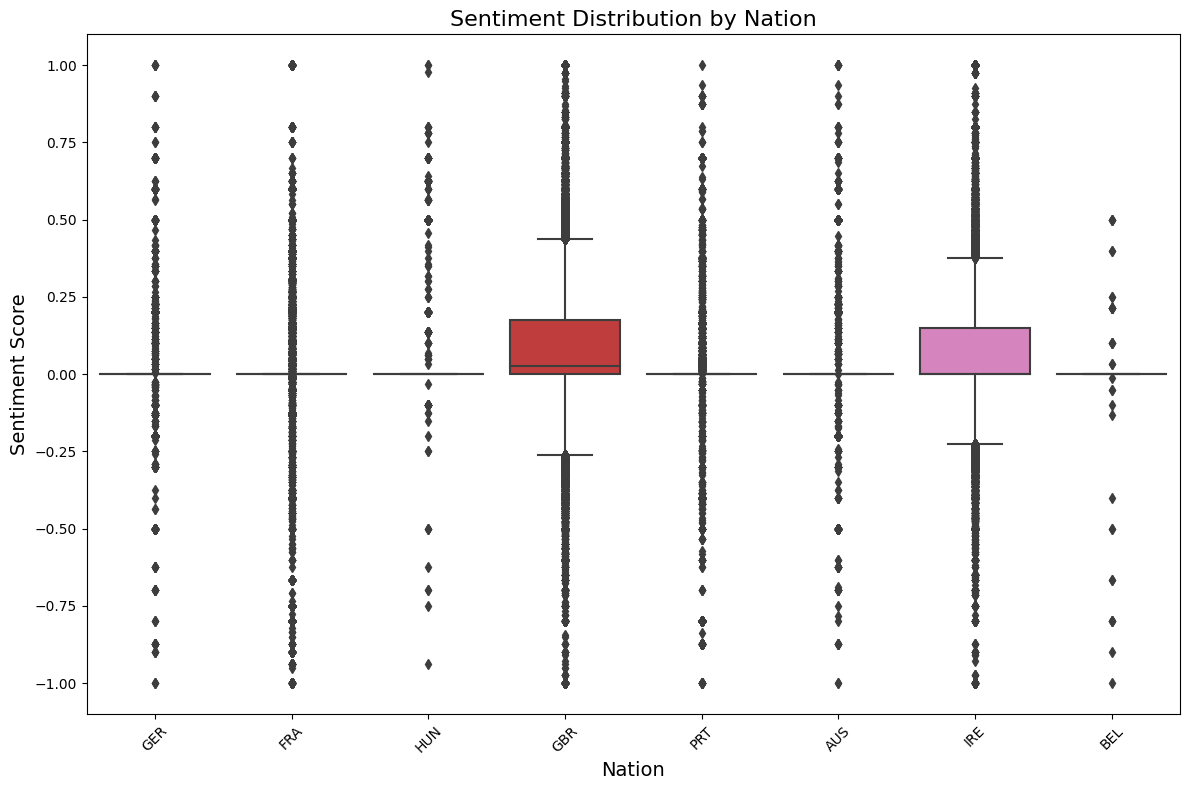

In [133]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df, x='nation', y='Sentiment')
plt.title("Sentiment Distribution by Nation", fontsize=16)
plt.xlabel("Nation", fontsize=14)
plt.ylabel("Sentiment Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

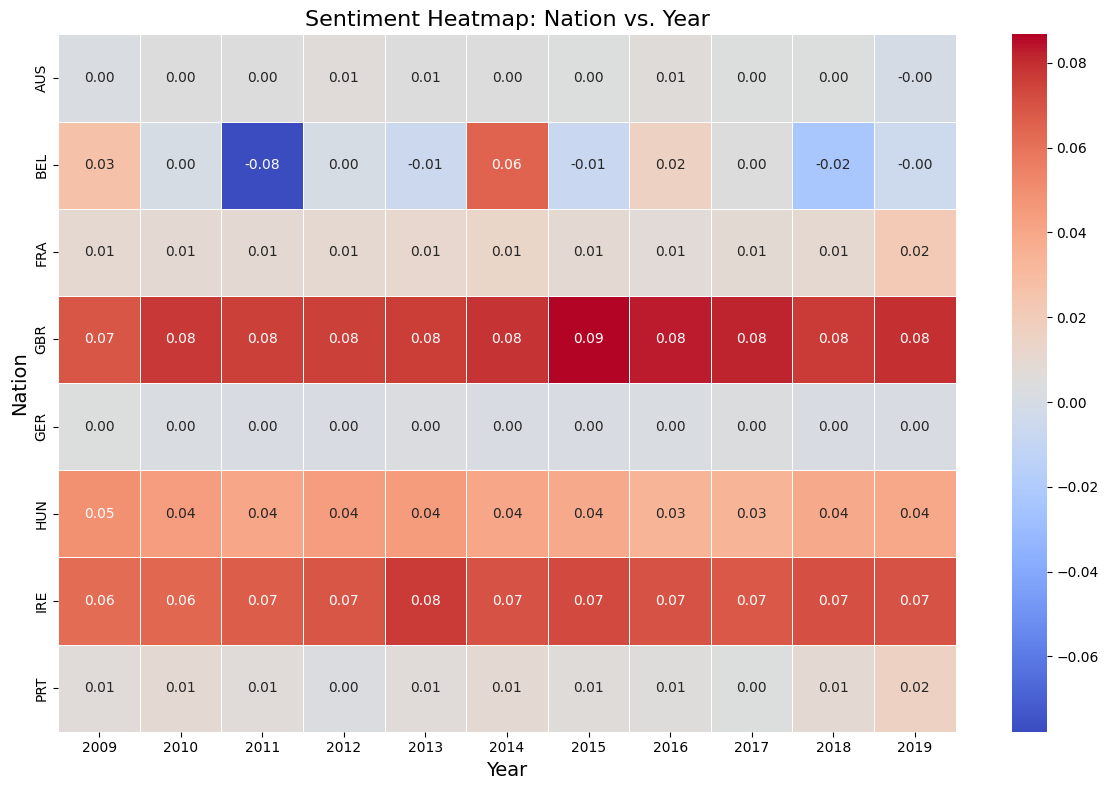

In [134]:
# Group by 'nation' and 'year', calculate the mean sentiment
heatmap_data = final_df.groupby(['nation', 'year'])['Sentiment'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Sentiment Heatmap: Nation vs. Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Nation", fontsize=14)
plt.tight_layout()
plt.show()

In [139]:
# i want to retrieve the most positive and negative speeches for each country

def most_positive_negative_speeches(df):
    # Find the most positive and negative speeches for each country
    positive = df.loc[df.groupby('nation')['Sentiment'].idxmax()]
    negative = df.loc[df.groupby('nation')['Sentiment'].idxmin()]
    
    # Return the DataFrames
    return positive, negative

positive, negative = most_positive_negative_speeches(final_df)

# Print the full text from most positive and negative speeches for each country

for nation in positive['nation'].unique():

    print(f"\nMost Positive Speech for {nation}:\n")
    print(positive[positive['nation'] == nation]['text'])
    
    print(f"\nMost Negative Speech for {nation}:\n")
    print(negative[negative['nation'] == nation]['text'])



Most Positive Speech for AUS:

57786    Abschließend möchte ich mich noch für Ihr Inte...
Name: text, dtype: object

Most Negative Speech for AUS:

714446    Internen Berechnungen der Nationalbank zufolge...
Name: text, dtype: object

Most Positive Speech for BEL:

87596    L‟immigration familiale fait en sorte qu‟un tr...
Name: text, dtype: object

Most Negative Speech for BEL:

263008    Les premiers ministres européens discutent à p...
Name: text, dtype: object

Most Positive Speech for FRA:

2568    (« Excellent ! » et applaudissements sur les b...
Name: text, dtype: object

Most Negative Speech for FRA:

124801    Qu’il me soit permis de dire au peuple américa...
Name: text, dtype: object

Most Positive Speech for HUN:

2568      Ahogy Herbály Imre képviselotársam azonnali ké...
476585    Amikor a pesti zsidónegyed bontása vagy az elr...
Name: text, dtype: object

Most Negative Speech for HUN:

124801     Összességében a kisebbségi véleményünk nem tám...
1200616    (Szabó Timea: 